<a href="https://colab.research.google.com/github/nestorsgarzonc/Data-Science-Proyects/blob/master/Credit_card_approval_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importar librerias necesarias

## Descargar paquetes

Al instalar los paquetes puede tardar aproximadamente 5 minutos

Nota: mnormt es una dependencia del paquete psych, se intala una version anterior por compatibilidad de version con la 2.0 de mnormt



In [ ]:
packageurl <- "https://cran.r-project.org/src/contrib/Archive/mnormt/mnormt_1.5-7.tar.gz"
install.packages(packageurl, repos=NULL, type="source")

In [ ]:
install.packages("psych", repos='https://www.icesi.edu.co/CRAN/')
install.packages("dplyr")   #Resumenes estadisticos
install.packages("ggplot2") #Graficos en general
install.packages('RCurl')   #Paquete para obtener archivos desde internet
install.packages("modeest") #Calcular moda
install.packages("dplyr")   #Agrupar datos
install.packages("fdth")    #Graficos descriptivos
install.packages("ggpubr")  #Grafico de medias

##Cargar paquetes

In [ ]:
library("ggplot2")
library("psych")
library("dplyr")
library ("RCurl")
library ("modeest")
library("fdth")
library("ggpubr")

# Cargar dataset

Nota: el dataset original tenia un problema de interpretacion en colab, por ello se modifico la codificacion y esta disponible ambas versiones en el siguiente repositorio: https://github.com/nestorsgarzonc/Data-analysis-R

In [ ]:
#download <- getURL("https://raw.githubusercontent.com/nestorsgarzonc/Data-analysis-R/master/Base_Banco.csv")
#data <- read.table (text = download, sep = ';', fileEncoding = "UCS-2LE")

In [ ]:
#head(data)

In [ ]:
#dim(data)

In [ ]:
#colnames(data) <- as.character(unlist(data[1,]))
#data = data[-1, ]

Importar dataframe modificado, se descarga el dataset alojado en GitHub usando el metodo:

```
getURL('URL')
```

Como la primera columna del dataset (X) es el indice del dataset, se define como el index del dataframe
```
read.csv(row.names='X')
```





In [ ]:
download <- getURL("https://raw.githubusercontent.com/nestorsgarzonc/Data-analysis-R/master/banco_dataframe.csv")
BaseBanco <- read.csv(text = download, row.names = 'X')

#Exploracion de datos

Las variables estan definidas de la siguiente manera


1.   **Edad**: Edad en años del cliente.
2.   **Ocupación**: Ocupación del cliente.
3.   **Est_civil**: Estado civil del cliente.
4. **Nivel_educativo**: Máximo nivel escolar alcanzado por el cliente.
5. **Contrato_meses**: Duración del último o actual contrato de trabajo del cliente.
6. **Cred_hipotecario**: Si el cliente tiene o no crédito hipotecario vigente con el banco.
7. **Cred_personal**: Si el cliente tiene o no crédito personal vigente con el banco.
8. **Medio_contacto**: Medio por el cual se contactó al cliente.
9. **Día**: Día del mes en el que se realizó el último contacto con el cliente.
10. **Mes**: Mes del año en el que se realizó el último contacto con el cliente.
11. **Duración_seg**: Duración en segundos del último contacto con el cliente.
12. **Cont_campaña_actual**: Número de veces que se contactó al cliente en la campaña mencionada.
13. **Campañas_previas**: Número de campañas de promoción en las que se ha incluido al cliente previamente.
14. **Aceptación_TC**: Si el cliente aceptó o no la tarjeta de crédito en la campaña mencionada.

A continuacion se realiza la inspeccion de las 5 primeras y 5 ultimas columnas del dataset

In [ ]:
head(BaseBanco)

,edad,ocupación,est_civil,nivel_educativo,contrato_meses,Cred_hipotecario,Cred_personal,Medio_contacto,Dia,Mes,duracion_seg,cont_campaña_actual,campañas_previas,aceptacion_TC
,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<fct>
0,30,desempleado,casado,primaria,21,no,no,celular,19,octubre,79,1,0,no
1,33,profesor,casado,bachillerato,37,si,si,celular,11,mayo,220,1,4,no
2,35,administrador,soltero,universitario,52,si,no,celular,16,abril,185,1,1,no
3,30,administrador,casado,universitario,27,si,si,chat,3,junio,199,4,0,no
4,59,informal,casado,bachillerato,6,si,no,chat,5,mayo,226,1,0,no
5,35,administrador,soltero,universitario,29,no,no,celular,23,febrero,141,2,3,no


In [ ]:
tail(BaseBanco)

,edad,ocupación,est_civil,nivel_educativo,contrato_meses,Cred_hipotecario,Cred_personal,Medio_contacto,Dia,Mes,duracion_seg,cont_campaña_actual,campañas_previas,aceptacion_TC
,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<fct>
4515,32,profesor,soltero,bachillerato,69,si,no,celular,7,julio,624,5,0,no
4516,33,profesor,casado,bachillerato,10,si,no,celular,30,julio,329,5,0,no
4517,57,independiente,casado,universitario,59,si,si,chat,9,mayo,153,1,0,no
4518,57,empresario,casado,bachillerato,40,no,no,celular,19,agosto,151,11,0,no
4519,28,informal,casado,bachillerato,59,no,no,celular,6,febrero,129,4,3,no
4520,44,emprendedor,soltero,universitario,49,si,si,celular,3,abril,345,2,7,no


In [ ]:
dim(BaseBanco)

[1] 4521   14

Nuestro dataset esta conformado de 4521 filas y 14 columnas las cuales son estan distribuidas de la siguiente manera

In [ ]:
str(BaseBanco)

'data.frame':	4521 obs. of  14 variables:
 $ edad               : int  30 33 35 30 59 35 36 39 41 43 ...
 $ ocupación          : Factor w/ 11 levels "administrador",..: 4 11 1 1 9 1 8 6 5 11 ...
 $ est_civil          : Factor w/ 3 levels "casado","divorciado",..: 1 1 3 1 1 3 1 1 1 1 ...
 $ nivel_educativo    : Factor w/ 4 levels "bachillerato",..: 2 1 4 4 1 4 4 1 4 2 ...
 $ contrato_meses     : int  21 37 52 27 6 29 38 42 67 62 ...
 $ Cred_hipotecario   : Factor w/ 2 levels "no","si": 1 2 2 2 2 1 2 2 2 2 ...
 $ Cred_personal      : Factor w/ 2 levels "no","si": 1 2 1 2 1 1 1 1 1 2 ...
 $ Medio_contacto     : Factor w/ 3 levels "celular","chat",..: 1 1 1 2 2 1 1 1 2 1 ...
 $ Dia                : int  19 11 16 3 5 23 14 6 14 17 ...
 $ Mes                : Factor w/ 12 levels "abril","agosto",..: 11 9 1 7 9 5 9 9 9 1 ...
 $ duracion_seg       : int  79 220 185 199 226 141 341 151 57 313 ...
 $ cont_campaña_actual: int  1 1 1 4 1 2 1 2 2 1 ...
 $ campañas_previas   : int  0 4 1 0 0 3 2 0 0

El dataset esta conformado por 14 variables las cuales 6 son cuantitativas y 8 son cualitativas.
Las variables cualitativas estan definidas como factores y tienen las siguientes clases:

In [ ]:
#Ocupacion
unique(BaseBanco$`ocupación`)

[1] desempleado     profesor        administrador   informal       
 [5] independiente   empresario      emprendedor     estudiante     
 [9] amadiciembreasa pensionado      desconocido    
11 Levels: administrador amadiciembreasa desconocido ... profesor

In [ ]:
#Estado civil
unique(BaseBanco$est_civil)

[1] casado     soltero    divorciado
Levels: casado divorciado soltero

In [ ]:
#Nivel educativo
unique(BaseBanco$nivel_educativo)

[1] primaria      bachillerato  universitario técnico      
Levels: bachillerato primaria técnico universitario

In [ ]:
#Medio de contacto
unique(BaseBanco$Medio_contacto)

[1] celular  chat     telefono
Levels: celular chat telefono

Las siguientes variables categoricas tienen salida binaria, si o no

In [ ]:
#Credito hipotecario
unique(BaseBanco$Cred_hipotecario)
#Credito personal
unique(BaseBanco$Cred_personal)
#Aceptacion de la tarjeta de credito
unique(BaseBanco$aceptacion_TC)

[1] no si
Levels: no si

[1] no si
Levels: no si

[1] no si
Levels: no si

A continuacion vamos a desestructurar el dataframe en variables para mayor comodidad y renombrar algunas variables que contienen simbolos como tildes, ñ y demas para seguir una misma convencion 👨‍💻👩‍💻

In [ ]:
attach(BaseBanco)

In [ ]:
colnames(BaseBanco)

[1] "edad"                "ocupación"           "est_civil"          
 [4] "nivel_educativo"     "contrato_meses"      "Cred_hipotecario"   
 [7] "Cred_personal"       "Medio_contacto"      "Dia"                
[10] "Mes"                 "duracion_seg"        "cont_campaña_actual"
[13] "campañas_previas"    "aceptacion_TC"

In [ ]:
ocupacion            <- `ocupación`
cred_hipotecario     <- Cred_hipotecario
cred_personal        <- Cred_personal
medio_contacto       <- Medio_contacto
dia                  <- Dia
mes                  <- Mes
cont_campana_actual  <- `cont_campaña_actual`
campanas_previas     <- `campañas_previas`

#Analisis datos

## Analisis variables cuantitativas

Las variables cuantitativas son:


1.   edad
2.   contrato_meses
3.   dia
4.   duracion_seg
5.   cont_campana_actual
6.   campanas_previas

Las variables cuantitativas a analizar individualmente son:


1.   edad
2.   contrato_meses
3.   duracion_seg
4.   cont_campana_actual


###Analisis general

Haciendo el summary de nuestro dataset se puede ver que para la edad media de los clientes es de 41 años con al parecer presencia de datos atipicos.

La mayoria de clientes son personas con un nivel educativo de bachillerato y universitario, son personas casadas y solteras, administradores e informales.

Generalmente hacen un contrato de 36 meses (la media y la mediana estan en un valor muy cercano, se prevee que sea simetrico), la mayoria de personas no tiene un credito vigente con el banco

El medio de contacto es fuertemente por celular siendo generalmente a mitad de mes (notese que la media y la mediana son muy cercanas), siendo fuertemente para casi desde mitad de año (mayo) con una duración de contacto medio de 185 segundos.

El numero de campañas que se realizo tiene una media de 0.54 y el numero de campañas en las que se contacto al cliente fue de 2, para estas dos variables seria interesante un analisis con media recortada ya que las colas estan fuertementes inclinadas en ambos casos. Finalmente la proporcion de personas que aceptan la tarjeta de credito es de 0.1152



In [ ]:
summary(BaseBanco)

      edad               ocupación        est_civil         nivel_educativo
 Min.   :19.00   administrador:969   casado    :2797   bachillerato :2306  
 1st Qu.:33.00   informal     :946   divorciado: 528   primaria     : 678  
 Median :39.00   empresario   :768   soltero   :1196   técnico      : 187  
 Mean   :41.17   independiente:661                     universitario:1350  
 3rd Qu.:49.00   profesor     :417                                         
 Max.   :87.00   pensionado   :230                                         
                 (Other)      :530                                         
 contrato_meses  Cred_hipotecario Cred_personal  Medio_contacto      Dia       
 Min.   : 1.00   no:1962          no:3830       celular :2896   Min.   : 1.00  
 1st Qu.:18.00   si:2559          si: 691       chat    :1324   1st Qu.: 9.00  
 Median :36.00                                  telefono: 301   Median :16.00  
 Mean   :36.27                                                  Mean   :

###Analisis especifico (por cada variable)

####Edad

La media de la edad al ser sensible a datos atipicos se procede a analizar la media con media recortada recortada para reducir la inestabilidad de la media concluyendo que esta mucho mas cercano a la mediana que es una medida robusta.

La moda de la edad es unica (unimodal), la edad media de los clientes es de 39-40 años


In [ ]:
#Tendencia central y posicion
paste('Media:', mean(edad))
paste('Mediana:', median(edad))
paste('Moda:', mfv(edad))
print('Quantiles:')
quantile(edad) 

[1] "Media: 41.170095111701"

[1] "Mediana: 39"

[1] "Moda: 34"

[1] "Quantiles:"


0%  25%  50%  75% 100% 
  19   33   39   49   87

In [ ]:
paste('Media con media recortada al 20%: ', mean(edad, trim=0.2))

[1] "Media con media recortada al 20%:  39.969037965352"

Podemos ver que la edad va desde los 19 años hasta los 87 años, con un rango intercuantilico de 16 años

In [ ]:
#Dispersion:
paste('Rango de la edad', range(edad))
paste('Rango intercuartilico de la edad', IQR(edad))
paste('Varianza de la edad', var(edad))

[1] "Rango de la edad 19" "Rango de la edad 87"

[1] "Rango intercuartilico de la edad 16"

[1] "Varianza de la edad 111.856238243164"

In [ ]:
paste('La edad de los clientes estan desviados de la media un: ', sd(edad), 'de la muestra')

[1] "La edad de los clientes estan desviados de la media un:  10.5762109587113 de la muestra"

In [ ]:
limiteSup<-mean(edad)+sd(edad)
limiteInf<-mean(edad)-sd(edad)
paste('La edad de los clientes que estan a una desviacion estandar de la media son:')
paste('X-s: ', limiteInf)
paste('X+s: ', limiteSup)

[1] "La edad de los clientes que estan a una desviacion estandar de la media son:"

[1] "X-s:  30.5938841529897"

[1] "X+s:  51.7463060704122"

In [ ]:
numClientesEdad<-sum(edad>limiteInf & edad<limiteSup)
paste('La cantidad de clientes que esta a una desviacion estandar son de:',
      numClientesEdad)

[1] "La cantidad de clientes que esta a una desviacion estandar son de: 3053"

El coeficiente de variacion al ser un valor bajo significa que no hay mucha dispersion respecto la media

In [ ]:
cv <- sd(edad)/mean(edad)*100
paste('El coeficiente de variacion es de: ', cv)

[1] "El coeficiente de variacion es de:  25.6890612713338"

La simetria al ser positiva cercana a cero significa que la cola esta levemente distribuida a la derecha
Por curtosis se sabe que la curva es mesocurtica tiende a cero

In [ ]:
paste('Asimetria de la edad: ', skew(edad))
paste('Curtosis de la edad: ', kurtosi(edad))

[1] "Asimetria de la edad:  0.699037353618127"

[1] "Curtosis de la edad:  0.345582521903384"

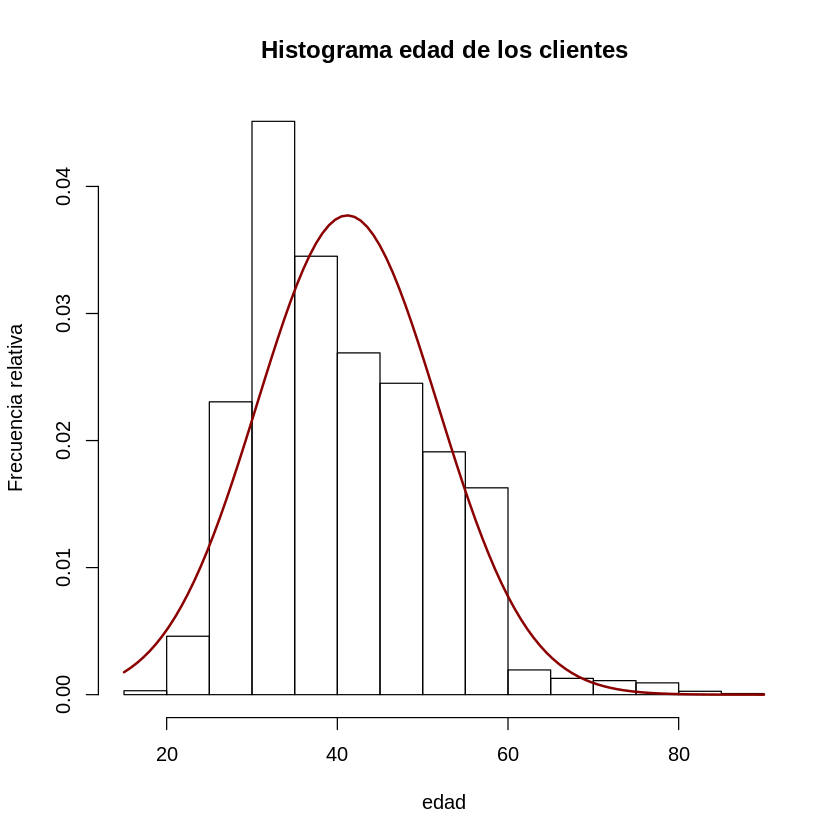

In [ ]:
hist(edad, freq = F, main = "Histograma edad de los clientes", xlab = "edad", ylab="Frecuencia relativa")
curve(dnorm(x,mean=mean(edad),sd=sd(edad)), col="darkred",lwd=2, add=TRUE)

####Contrato por meses

El contrato a meses es la duracion del actual o ultimo contrato de trabajo del cliente.

La media y la mediana estan muy cercanas.
El contrato por meses sigue una moda del tipo unimodal

In [ ]:
#Tendencia central y posicion
paste('Media:', mean(contrato_meses))
paste('Mediana:', median(contrato_meses))
paste('Moda:', mfv(contrato_meses))
print('Quantiles:')
quantile(contrato_meses) 

[1] "Media: 36.2720637027206"

[1] "Mediana: 36"

[1] "Moda: 52"

[1] "Quantiles:"


0%  25%  50%  75% 100% 
   1   18   36   54   72

El contrato por meses va desde 1 hasta 72 meses con un rango intercuantilico de 36

In [ ]:
#Dispersion:
paste('Rango de la contrato_meses', range(contrato_meses))
paste('Rango intercuartilico de la contrato_meses', IQR(contrato_meses))
paste('Varianza de la contrato_meses', var(contrato_meses))

[1] "Rango de la contrato_meses 1"  "Rango de la contrato_meses 72"

[1] "Rango intercuartilico de la contrato_meses 36"

[1] "Varianza de la contrato_meses 429.754283549923"

In [ ]:
paste('El contrato por meses de los clientes estan desviados de la media un: ', 
      sd(contrato_meses), 'de la muestra')

[1] "El contrato por meses de los clientes estan desviados de la media un:  20.7305157569686 de la muestra"

In [ ]:
limiteSup<-mean(contrato_meses)+sd(contrato_meses)
limiteInf<-mean(contrato_meses)-sd(contrato_meses)
paste('El contrato por meses de los clientes que estan a una desviacion estandar de la media son:')
paste('X-s: ', limiteInf)
paste('X+s: ', limiteSup)

[1] "El contrato por meses de los clientes que estan a una desviacion estandar de la media son:"

[1] "X-s:  15.541547945752"

[1] "X+s:  57.0025794596892"

El coeficiende de variacion al ser un valor alto significa que hay dspersion de los datos respecto la media

In [ ]:
cv <- sd(contrato_meses)/mean(contrato_meses)*100
paste('El coeficiente de variacion es de: ', cv)

[1] "El coeficiente de variacion es de:  57.1528433751997"

La asimetria por ser cercana a cero significa que esta levemente inclinada a la derecha y la curtosis es negativa por ende es platicurtica

In [ ]:
paste('Asimetria: ', skew(contrato_meses))
paste('Curtosis: ', kurtosi(contrato_meses))

[1] "Asimetria:  0.012156707701867"

[1] "Curtosis:  -1.21561298993624"

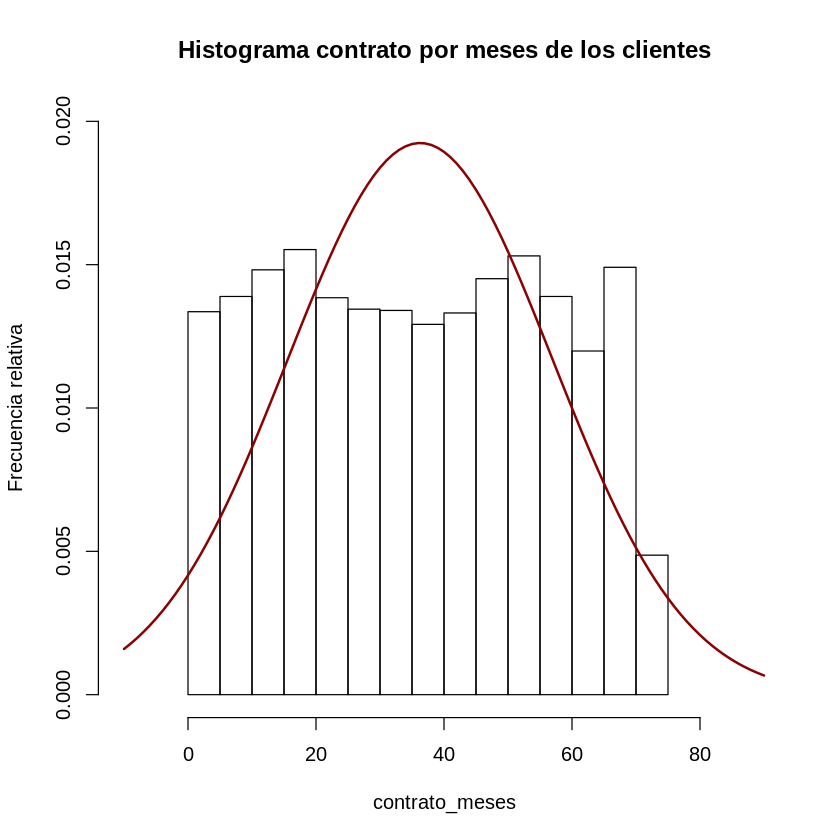

In [ ]:
hist(contrato_meses, freq = F, main = "Histograma contrato por meses de los clientes", xlab = "contrato_meses", ylab="Frecuencia relativa", xlim=range(-10, 90), ylim=range(0, 0.02) )
curve(dnorm(x,mean=mean(contrato_meses),sd=sd(contrato_meses)), col="darkred",lwd=2, add=TRUE)

####Duracion segundos contacto cliente

La duracion en segundos del ultimo contacto con el cliente tiene una media y mediana alejada por presencia de datos atipicos, por ello vamos a tomar la media recortada al 20% para evitar los posibles datos atipicos, como se ve en el rango intercuantilico pasamos de tener 329  en el 75% a tener 3025 en el 100%. La media recortada ahora esta mas cercana a la mediana

In [ ]:
#Tendencia central y posicion
paste('Media:', mean(duracion_seg))
paste('Mediana:', median(duracion_seg))
paste('Moda:', mfv(duracion_seg))
print('Quantiles:')
quantile(duracion_seg) 

[1] "Media: 263.961291749613"

[1] "Mediana: 185"

[1] "Moda: 123"

[1] "Quantiles:"


0%  25%  50%  75% 100% 
   4  104  185  329 3025

In [ ]:
paste('Media con media recortada al 20%: ', mean(duracion_seg, trim=0.2))

[1] "Media con media recortada al 20%:  198.719498709915"

En el anterior punto se analizo la presencia de grandes datos atipicos, en el rango intercuantilico va desde 3 hasta 3025

In [ ]:
#Dispersion:
paste('Rango de la duracion_seg', range(duracion_seg))
paste('Rango intercuartilico de la duracion_seg', IQR(duracion_seg))
paste('Varianza de la duracion_seg', var(duracion_seg))

[1] "Rango de la duracion_seg 4"    "Rango de la duracion_seg 3025"

[1] "Rango intercuartilico de la duracion_seg 225"

[1] "Varianza de la duracion_seg 67525.469519039"

In [ ]:
paste('El ultimo contacto con los clientes estan desviados de la media un: ', 
      sd(duracion_seg), 'de la muestra')

[1] "El ultimo contacto con los clientes estan desviados de la media un:  259.856632624682 de la muestra"

In [ ]:
limiteSup<-mean(duracion_seg)+sd(duracion_seg)
limiteInf<-mean(duracion_seg)-sd(duracion_seg)
paste('El ultimo contacto con los clientes que estan a una desviacion estandar de la media son:')
paste('X-s: ', limiteInf)
paste('X+s: ', limiteSup)

[1] "El ultimo contacto con los clientes que estan a una desviacion estandar de la media son:"

[1] "X-s:  4.10465912493089"

[1] "X+s:  523.817924374295"

El coeficiente de variacion de lo clientes al ser un valor alto signiifica que hay una alta dispersion de los datos respecto la media

In [ ]:
cv <- sd(duracion_seg)/mean(duracion_seg)*100
paste('El coeficiente de variacion es de: ', cv)

[1] "El coeficiente de variacion es de:  98.44497687607"

La asimetria al ser positiva significa que la cola esta a la derecha con un nivel de cursosis leptocurtico

In [ ]:
paste('Asimetria: ', skew(duracion_seg))
paste('Curtosis: ', kurtosi(duracion_seg))

[1] "Asimetria:  2.77058029362506"

[1] "Curtosis:  12.5080068641227"

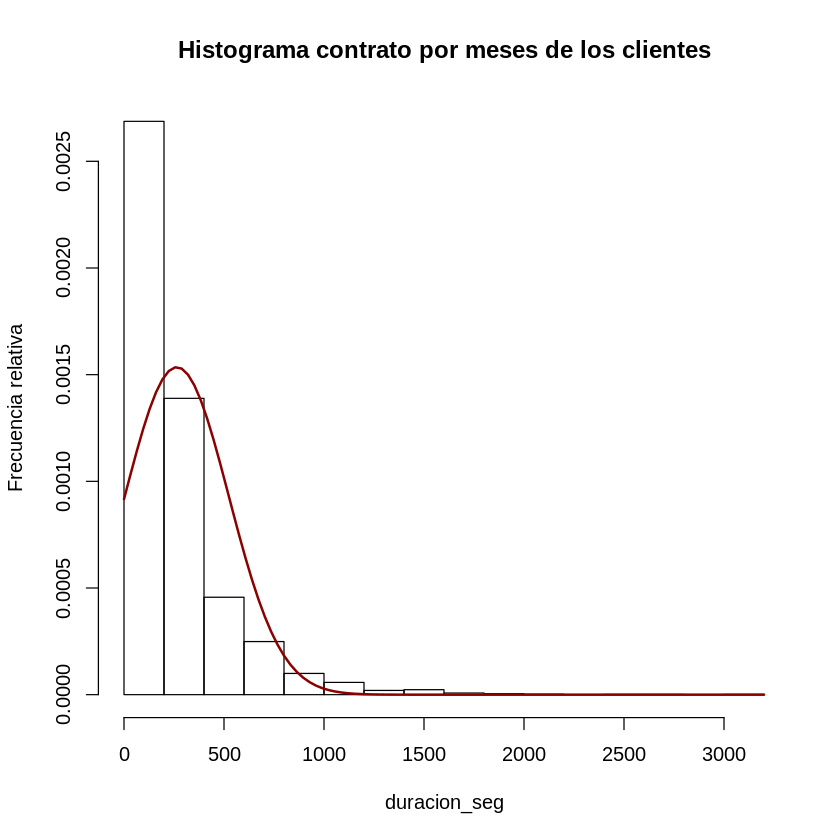

In [ ]:
hist(duracion_seg, freq = F, main = "Histograma contrato por meses de los clientes", xlab = "duracion_seg", ylab="Frecuencia relativa")
curve(dnorm(x,mean=mean(duracion_seg),sd=sd(duracion_seg)), col="darkred",lwd=2, add=TRUE)

###Analisis varias varibles

En esta sesion vamos a comparar graficos las siguientes variables y hacer su respectivo analisis:
1. Edad vs aceptacion tarjeta de credito
2. Medio de contacto vs contrato meses
3. Contador camapaña actual vs aceptacion tarjeta credito
4. Medio de contacto vs Dia
5. Dia vs aceptacion TC
6. Nivel educativo vs contrato meses
7. Estado civil vs contrato meses

####1. Edad vs aceptacion tarjeta de credito

Segun la grafica comparando si las personas aceptaron o no una tarjeta de credito segun las edades se puede concluir que tiene una asimetria positiva en ambos casos significando que las personas mas joven sean el publico objetivo para los bancos, no obstante son muchas mas las personas que rechazan que las que aceptan la tarjeta.
En personas de edad mayor (vease la cola) se puede ver que el banco son las que menos acuden

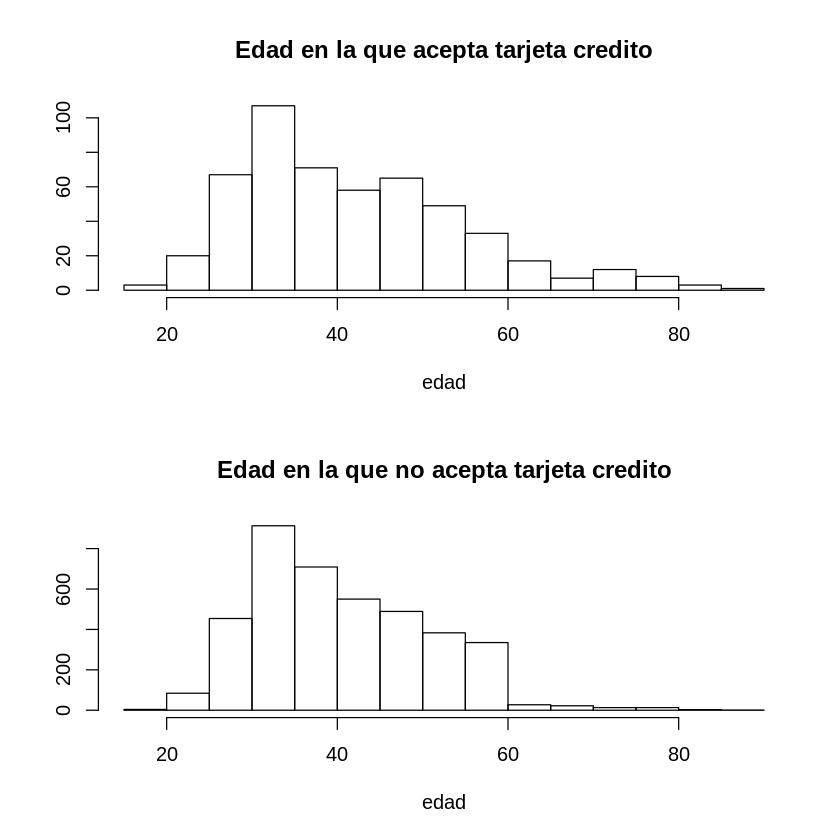

In [ ]:
par(mfrow=c(2,1))
hist(edad[aceptacion_TC=="si"], main="Edad en la que acepta tarjeta credito", xlab="edad", ylab="")
hist(edad[aceptacion_TC=="no"], main="Edad en la que no acepta tarjeta credito", xlab="edad", ylab="")

####2. Medio de contacto vs contrato meses

Por las graficas se puede ver que se comporta de manera casi uniforme excepto por la cola los ultimos meses.
Se puede ver que la mayoria de los clientes fueron por celular siendo el canal mas efectivo seguido por el chat. Para cuando son una gran cantidad de meses se  puede ver que hay una menor cantidad de clientes.

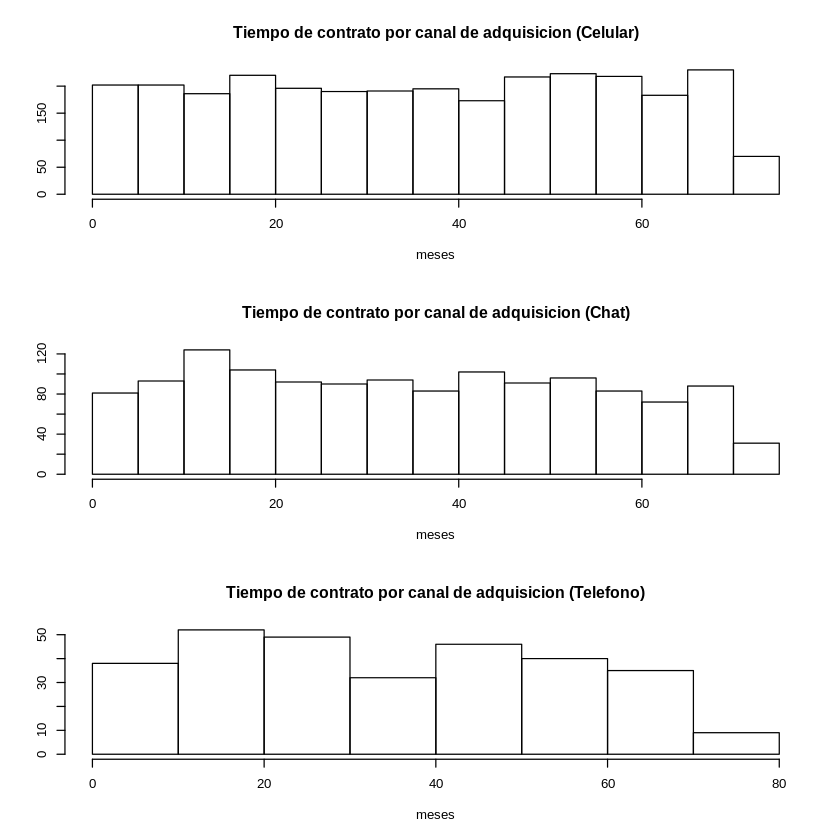

In [ ]:
par(mfrow=c(3,1))
hist(contrato_meses[medio_contacto=="celular"], main="Tiempo de contrato por canal de adquisicion (Celular)", xlab="meses", ylab="")
hist(contrato_meses[medio_contacto=="chat"], main="Tiempo de contrato por canal de adquisicion (Chat)", xlab="meses", ylab="")
hist(contrato_meses[medio_contacto=="telefono"], main="Tiempo de contrato por canal de adquisicion (Telefono)", xlab="meses", ylab="")

####3. Contador campaña actual vs aceptacion tarjeta credito

Segun los histogramas se puede ver que los datos siguen una alta asimetria positiva mostrando que la mayoria de veces en que se tiene una respuesta son en las primeras iteraciones.

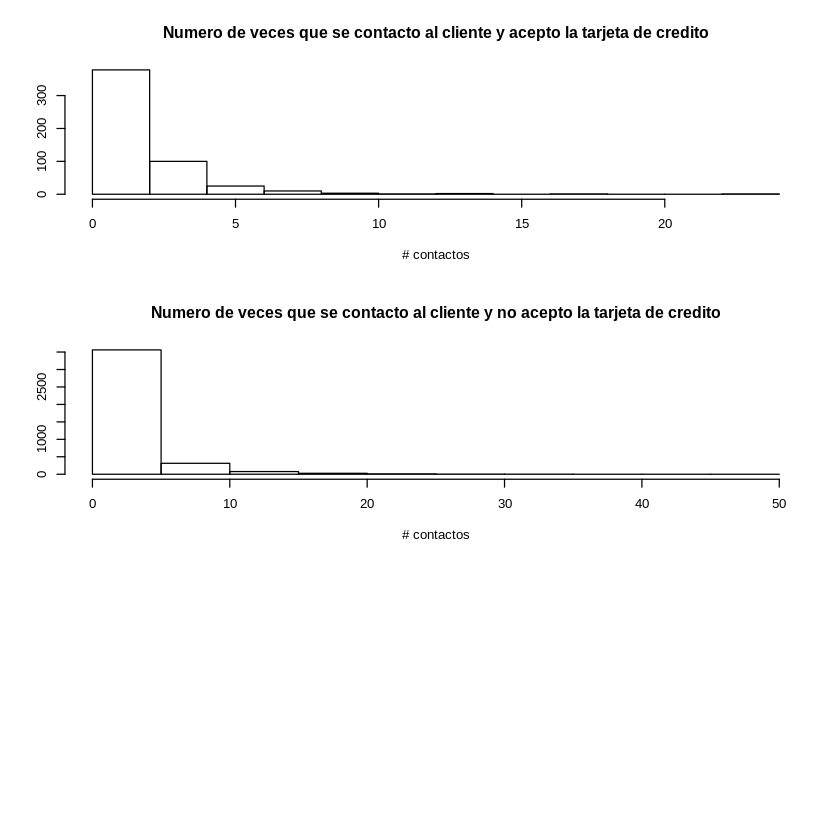

In [ ]:
par(mfrow=c(2,1))
hist(cont_campana_actual[aceptacion_TC=="si"], main="Numero de veces que se contacto al cliente y acepto la tarjeta de credito", xlab="# contactos", ylab="")
hist(cont_campana_actual[aceptacion_TC=="no"], main="Numero de veces que se contacto al cliente y no acepto la tarjeta de credito", xlab="# contactos", ylab="")

####4. Medio de contacto vs dia

Como se puede ver en las graficas las solicitudes de las tarjetas de credito al principio y a final de mes se comporta muy similar en el caso de el celular y chat como canal de adquisicion

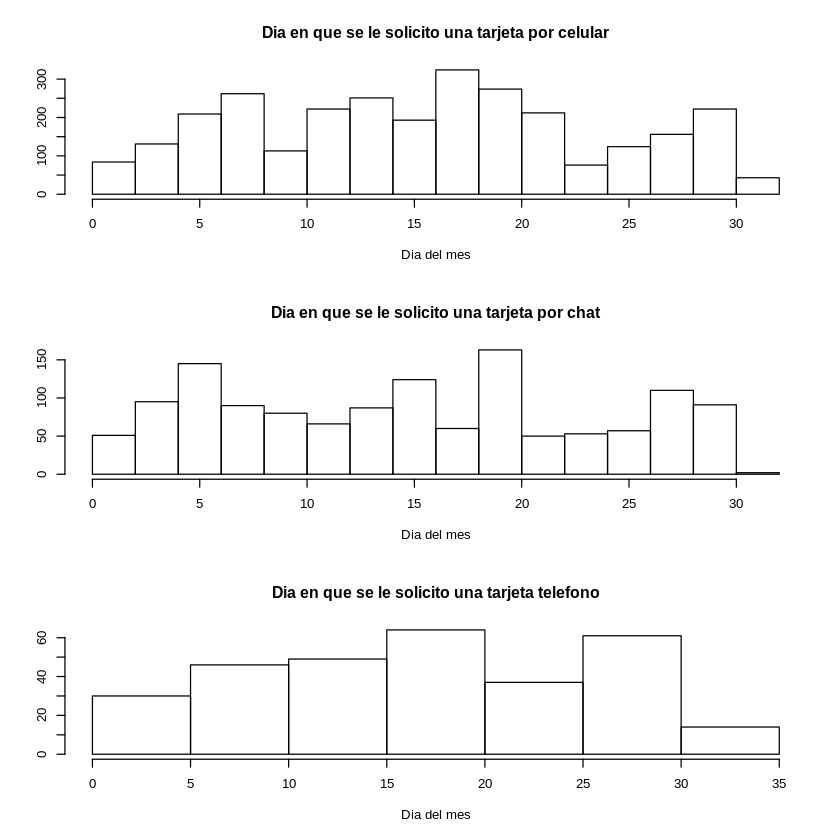

In [ ]:
par(mfrow=c(3,1))
hist(dia[medio_contacto=="celular"], main="Dia en que se le solicito una tarjeta por celular", xlab="Dia del mes", ylab="")
hist(dia[medio_contacto=="chat"], main="Dia en que se le solicito una tarjeta por chat", xlab="Dia del mes", ylab="")
hist(dia[medio_contacto=="telefono"], main="Dia en que se le solicito una tarjeta telefono", xlab="Dia del mes", ylab="")

####5. Dia vs aceptacion

Segun los dos histogramas los clientes que aceptan o rechazan la tarjeta mantiene un comportamiento similar

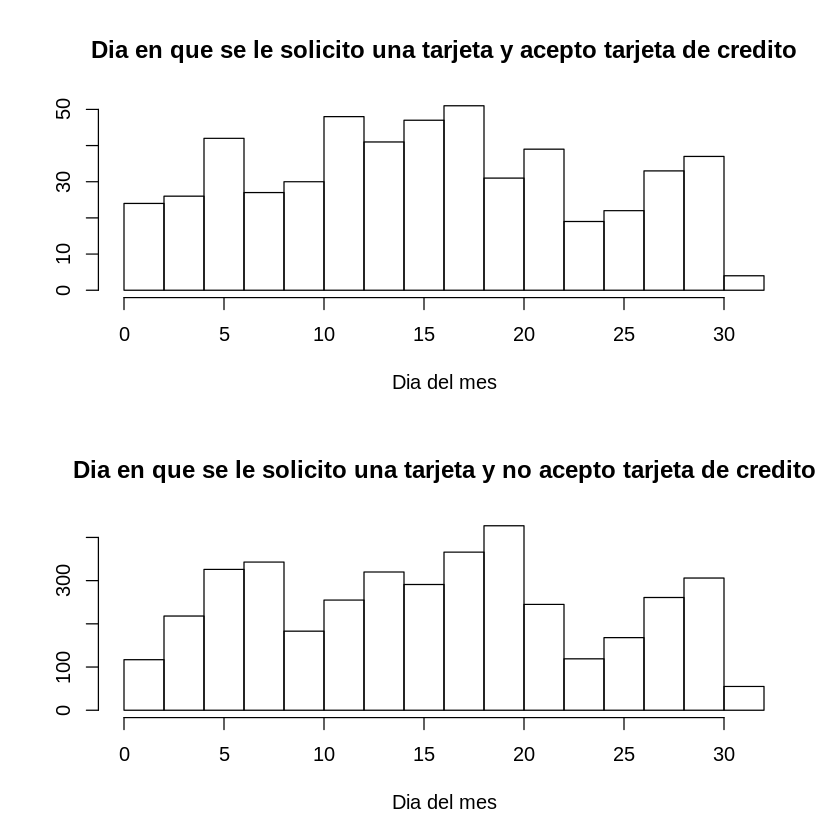

In [ ]:
par(mfrow=c(2,1))
hist(dia[aceptacion_TC=="si"], main="Dia en que se le solicito una tarjeta y acepto tarjeta de credito", xlab="Dia del mes", ylab="")
hist(dia[aceptacion_TC=="no"], main="Dia en que se le solicito una tarjeta y no acepto tarjeta de credito", xlab="Dia del mes", ylab="")

####6. Nivel educativo vs contrato por meses

Se puede ver que hay mas personas en contratos de bachilleratos y menos en tecnicos.
En todos los niveles educativos se ve que hay una menor cantidad de contratos para una cantidad de meses larga, de resto se comporta de manera casi uniforme.

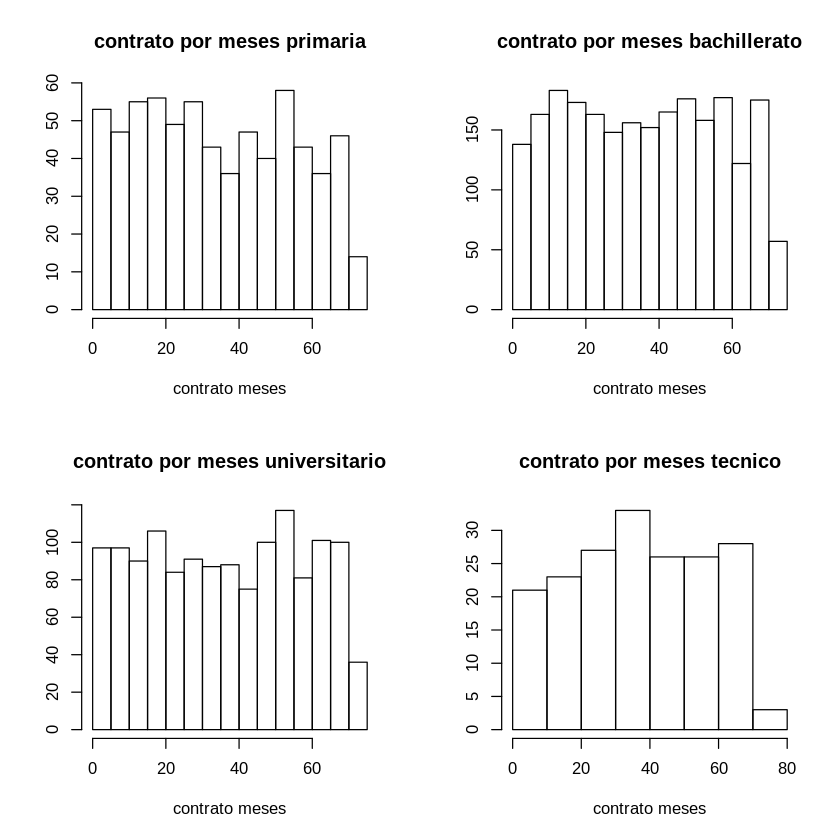

In [ ]:
par(mfrow=c(2,2))
hist(contrato_meses[nivel_educativo=="primaria"], main="contrato por meses primaria", xlab="contrato meses", ylab="")
hist(contrato_meses[nivel_educativo=="bachillerato"], main="contrato por meses bachillerato", xlab="contrato meses", ylab="")
hist(contrato_meses[nivel_educativo=="universitario"], main="contrato por meses universitario", xlab="contrato meses", ylab="")
hist(contrato_meses[nivel_educativo=="técnico"], main="contrato por meses tecnico", xlab="contrato meses", ylab="")

####7. Estado civil vs contrato meses

Bonus: Segun este grafico las personas solteras, casadas o divorciadas mantienen un contrato con un comportamiento muy similar, pero las muestras para las personas casadas son grandes mientras que las de las personas divorsiadas son aproximadamente 1/4

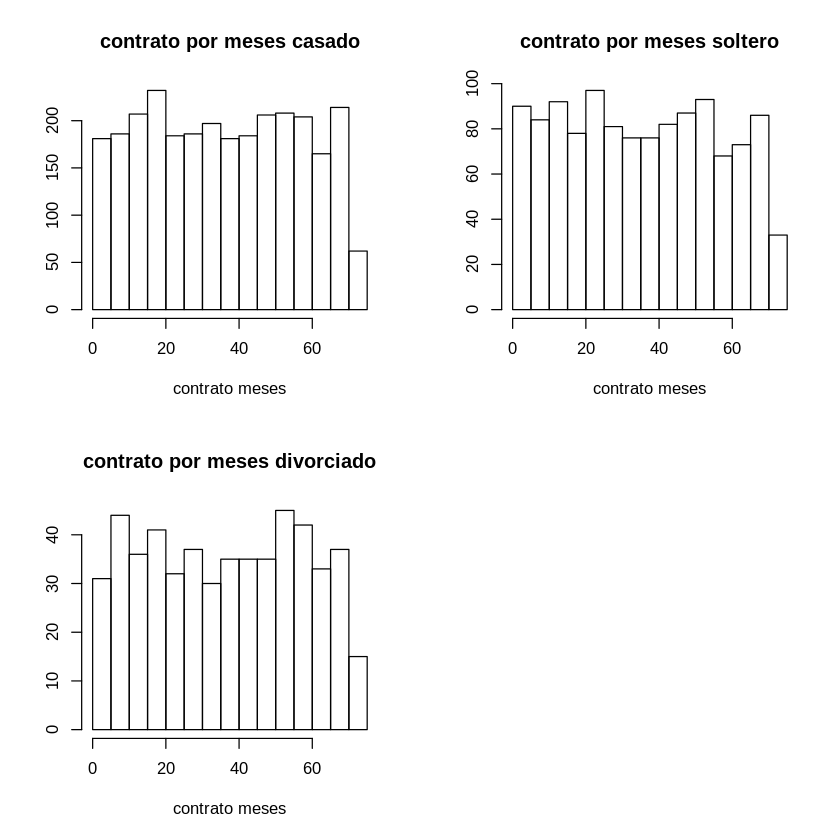

In [ ]:
par(mfrow=c(2,2))
hist(contrato_meses[est_civil=="casado"], main="contrato por meses casado", xlab="contrato meses", ylab="")
hist(contrato_meses[est_civil=="soltero"], main="contrato por meses soltero", xlab="contrato meses", ylab="")
hist(contrato_meses[est_civil=="divorciado"], main="contrato por meses divorciado", xlab="contrato meses", ylab="")

##Analisis variables cualitativas

Las variables cualitativas son:

 * ocupación          
 * est_civil          
 * nivel_educativo    
 * Cred_hipotecario  
 * Cred_personal     
 * Medio_contacto     
 * Mes                
 * aceptacion_TC 

Las variables a analizar individualmente son:

 * ocupación          
 * est_civil          
 * nivel_educativo
 * Cred_hipotecario    
 * aceptacion_TC 

###Analisis por cada variable

####Ocupacion

Por ocupacion, la mayor proporcion de clientes esta dada por administradores, empresarios y profesores

In [ ]:
tabla_ocupacion <- table(ocupacion)
tabla_ocupacion

ocupacion
  administrador amadiciembreasa     desconocido     desempleado     emprendedor 
            969             112              38             128             168 
     empresario      estudiante   independiente        informal      pensionado 
            768              84             661             946             230 
       profesor 
            417 

In [ ]:
prop.table(tabla_ocupacion)

ocupacion
  administrador amadiciembreasa     desconocido     desempleado     emprendedor 
     0.21433311      0.02477328      0.00840522      0.02831232      0.03715992 
     empresario      estudiante   independiente        informal      pensionado 
     0.16987392      0.01857996      0.14620659      0.20924574      0.05087370 
       profesor 
     0.09223623 

####Estado civil

Por estado civil la mayor proporcion de clientes esta dada por personas casadas

In [ ]:
tabla_est_civil <- table(est_civil)
tabla_est_civil

est_civil
    casado divorciado    soltero 
      2797        528       1196 

In [ ]:
prop.table(tabla_est_civil)

est_civil
    casado divorciado    soltero 
 0.6186684  0.1167883  0.2645432 

####Nivel educativo

Para el nivel educativo la mayor proporcion de personas esta dada por personas de bachilleres y universitarios

In [ ]:
tabla_nivel_educativo <- table(nivel_educativo)
tabla_nivel_educativo

nivel_educativo
 bachillerato      primaria       técnico universitario 
         2306           678           187          1350 

In [ ]:
prop.table(tabla_nivel_educativo)

nivel_educativo
 bachillerato      primaria       técnico universitario 
   0.51006415    0.14996682    0.04136253    0.29860650 

####Credito hipotecario

El 56.60% de los clientes tiene un credito hipotecario vigente con el banco

In [ ]:
tabla_cred_hipotecario <- table(cred_hipotecario)
tabla_cred_hipotecario

cred_hipotecario
  no   si 
1962 2559 

In [ ]:
prop.table(tabla_cred_hipotecario)

cred_hipotecario
       no        si 
0.4339748 0.5660252 

####Aceptacion tarjeta de credito

El 88.476% de los clientes no aceptaron la tarjeta de credito

In [ ]:
tabla_aceptacion_TC <- table(aceptacion_TC)
tabla_aceptacion_TC

aceptacion_TC
  no   si 
4000  521 

In [ ]:
prop.table(tabla_aceptacion_TC)

aceptacion_TC
     no      si 
0.88476 0.11524 